## Text to Image Generation

![text to image](../assets/text_to_image_generation.png)

![image.png](../assets/general_arch_multi_model.png)

### Auto-regressive Models: 

These models treat the task like translating text descriptions into sequences of image tokens, similar to language models generating sentences. Like puzzle pieces, these tokens, created by image tokenizers like VQ-VAE, represent basic image features. The model uses an encoder-decoder architecture: the encoder extracts information from the text prompt, and the decoder, guided by this information, predicts one image token at a time, gradually building the final image pixel by pixel. This approach allows for high control and detail, but faces challenges in handling long, complex prompts and can be slower than alternative methods like diffusion models. The generation process is shown in the above figure (a).

### Stable Diffusion Models: 

Stable Diffusion Models uses “Latent Diffusion” technique, where it builds images from noise by progressively denoising it, guided by a text prompt and a frozen CLIP text encoder. Its light architecture with a UNet backbone and CLIP encoder allows for GPU-powered image generation, while its latent focus reduces memory consumption. This unique setup empowers diverse artistic expression, translating textual inputs into photorealistic and imaginative visuals. The generation process is shown in the above figure (b).

In [1]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

  Using cached diffusers-0.33.1-py3-none-any.whl.metadata (19 kB)
Using cached diffusers-0.33.1-py3-none-any.whl (3.6 MB)
  Using cached accelerate-1.7.0-py3-none-any.whl.metadata (19 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00
Using cached accelerate-1.7.0-py3-none-any.whl (362 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [accelerate]4 [accelerate]on]


In [2]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
# pipe.to("cuda")
pipe.to('mps')

prompt = "An astronaut riding a unicorn"

images = pipe(prompt=prompt).images[0]

100%|██████████| 50/50 [01:21<00:00,  1.63s/it]


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

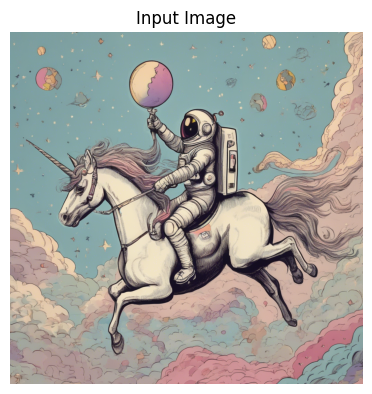

In [3]:
import matplotlib.pyplot as plt

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images)
plt.title("Input Image")
plt.axis('off')